In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_path = 'data/ex2data1.txt'
data = pd.read_csv(data_path, header=None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


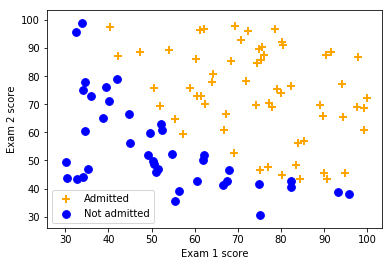

In [4]:
neg = data['y'] == 0
pos = data['y'] == 1
plt.scatter(data[pos]['x1'],data[pos]['x2'], marker='+', c='orange', s=60, linewidth=2, label = "Admitted")
plt.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label = "Not admitted" )
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='best')
plt.show()

In [5]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]
# convert to np.array
X = x.values
# insert 1's (x_0)
X = np.insert(X, 0, 1, axis=1)
y = y.values

In [6]:
### Sigmoid function

def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [7]:
### Hypothesis and cost function

m = X.shape[0]
def Cost(theta, X, y):
    h = sigmoid(X.dot(theta))
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
          
    if np.isnan(J.item()):
        return(np.inf)
    return(J.item())

In [8]:
theta_initial = np.zeros(X.shape[1]).reshape(-1,1)
Cost(theta_initial,X,y)

0.6931471805599453

In [9]:
def gradient(theta, X, y):
    h = sigmoid(X.dot(theta))
    
    grad =(1/m)*X.T.dot(h-y)

    return grad

In [10]:
theta_initial = np.zeros(X.shape[1]).reshape(-1,1)
cost = Cost(theta_initial, X, y)
grad = gradient(theta_initial, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.6931471805599453
Grad: 
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [11]:
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):

        theta = theta - alpha*gradient(theta,X,y)
        J_history[iter] = Cost(theta,X,y)
    return(theta, J_history)